## Linear Regression : 

#### Korelasyon : 
Değişkenler arasındaki ilişkinin yönünü ve doğrusal eğimin gücünü bize verir. Yani bir artarken diğeri artıyor mu veya azalıyor mu bunu gösterir. -1 ve +1 arasında değerler alır. 0 dan büyükse pozitif yönlü, 0 dan küçükse negatif yönlü korelasyon var demektir. 

#### Linear Relationship : 
Değişkenlerin target arasında ki ilişki linear bir doğru hizasındaysa Linear relationship var demektir. Linear düz bir çizgi üzerinde olması önemlidir. 
Eğer tek future varsa linear basic regression, 
2 ve daha fazla future varsa Multiplinear regression demektir. 
Korelasyon ilişki -1 ve +1 arasında ki değerler ile ifade edilirken regression da bir line ile ifade edilir.

### Linear Regression : 
Korelasyon üzerine çalışır, future ve target arasında ki ilişkiyi inceler ve o ilişkiye göre tahminleme de yapar.

Yi = a + b*X ile ifade edilir. 
a burda sabit sayımız intercept, b ise coef yani X futuremiz çarptığımız kat sayıdır. Yi ise tahmin ettiğimiz değerlerdir. 
ei = Y - Yi => random error denir. gerçek değerlerden tahmin edilen değerler çıkarılarak bulunur. 

#### R2 score : 
0 ve 1 arasında değerler alır. Elimizdeki data ile tahmin ettmek istediğimiz değerleri ne kadar karşılıyoruz. 1 e yaklaştıkça tahminimşz oldukça başarılı olmuş demektir. 0 ise hep hatalı tahmnleme yaptık demektir. Regression modelin başarı durumunu gösterir. Eğer 1 tane target varsa r korelasyon değeri bulup onun karesini alıp R2 score bulunabilir. ama 2 ve daha fazla future varsa 

R2_score = ((Y - Y_pred)**2).sum() / ((Y - Y.mean())**2).sum()

### İmport Library : 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
plt.rcParams["figure.figsize"] = (10,6) # tüm görsellerin aynı boyutta olması için sabitledik.
import warnings
warnings.filterwarnings("ignore") # verilen uyarıları notebook getirmesin

### Read Dataset : 

In [4]:
df = pd.read_csv("Advertising.csv")
df.head()
# 200 satır ve 4 sutundan oluşan bir dataset
# TV : bizim satış için TV den verdiğimiz reklam
# radio : radiodan verdiğimiz reklamlar
# newspaper : gazeteden verdiğimiz reklamlar.
# sales : reklam giderleri sonucu elde ettiğimiz satış tutarı

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()
# hiç null değerimiz yok. tüm değerlerimizin veri tipleri float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


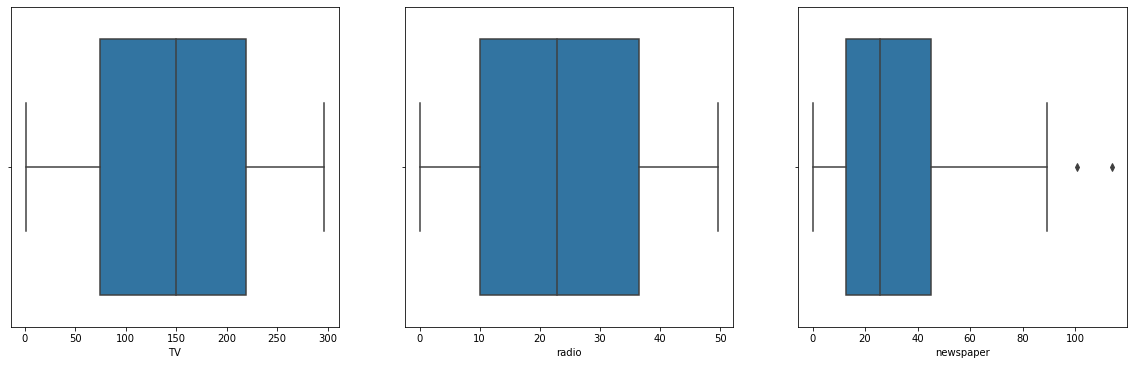

In [7]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "sales":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(df[feature])
        # newspaper da biraz outlier var ama sonuca çok etki edecek sayıda değil.

In [8]:
df.describe().T
# standart sapma > mean ise bir outlier tehlikesi olabilir. 

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
Q1 = df["newspaper"].quantile(0.25)
Q3 = df["newspaper"].quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1-(1.5*IQR)
ust_sinir = Q3+(1.5*IQR)
aykiri_alt = df["newspaper"] < alt_sinir
aykiri_ust = df["newspaper"] > ust_sinir
print("newspaper tablosunda toplamda =", df["newspaper"][aykiri_alt].count(),"aykırı alt veri vardır.")
print( "newspaper tablosunda toplamda =",df["newspaper"][aykiri_ust].count(), "aykırı üst veri vardır.")
#df[i][aykiri_alt] = alt_sinir
#df[i][aykiri_ust] = ust_sinir

newspaper tablosunda toplamda = 0 aykırı alt veri vardır.
newspaper tablosunda toplamda = 2 aykırı üst veri vardır.


In [10]:
print("newspaper tablosu için belirlenen üst sınır = ", ust_sinir)
df["newspaper"][aykiri_ust]

newspaper tablosu için belirlenen üst sınır =  93.625


16     114.0
101    100.9
Name: newspaper, dtype: float64

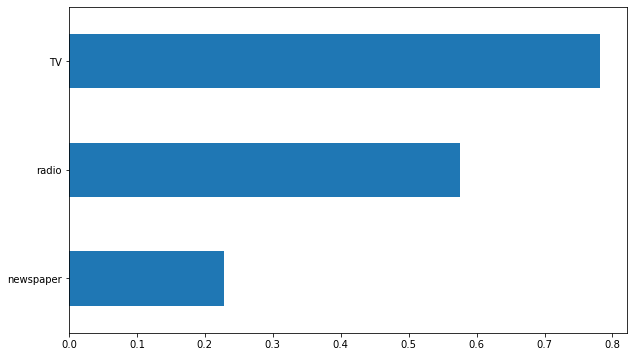

In [11]:
# Eğer bağımsız değişkenim ve bağımlı değişkenim arasında kuvvetli korelasyon varsa anlamlı bir linear model vardır.
df.corr()["sales"].drop("sales").sort_values().plot.barh();

In [12]:
df.corr()["sales"].drop("sales").sort_values()
# target ile en yüksek korelasyona sahip future TV dir. en düşük ise newspaper futuremiz.

newspaper    0.228299
radio        0.576223
TV           0.782224
Name: sales, dtype: float64

<AxesSubplot:>

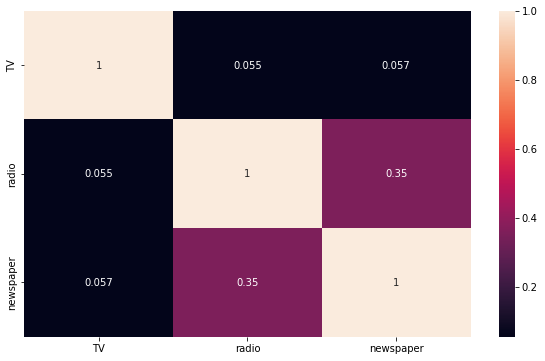

In [13]:
df_corr = df.drop(["sales"], axis=1)
sns.heatmap(df_corr.corr(), annot=True)
# Tv ve radio arası korelasyo = 0.055 oldukça az bir ilişki var
# TV ve newspaper arası korelasyon = 0.057 az ilişki var.
# radio ve newspaper arası korelasyon ise = 0.35
# MultiColinearty durumu yok.

In [14]:
df_corr.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [15]:
for i in df.drop(columns = "sales") : 
    print(f"target ile {i} sutunumuzun korelasyon durumu : {df.sales.corr(df[i])}")

target ile TV sutunumuzun korelasyon durumu : 0.7822244248616061
target ile radio sutunumuzun korelasyon durumu : 0.5762225745710551
target ile newspaper sutunumuzun korelasyon durumu : 0.22829902637616528


In [16]:
# Bugün simple liear regression işlediğimiz için tek future olacak : 
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
for i in df.drop(columns = "sales") : 
    print(f"target ile {i} sutunumuzun korelasyon durumu : {df.sales.corr(df[i])}")
    # total_spend en yüksek çıktı.

target ile TV sutunumuzun korelasyon durumu : 0.7822244248616061
target ile radio sutunumuzun korelasyon durumu : 0.5762225745710551
target ile newspaper sutunumuzun korelasyon durumu : 0.22829902637616528
target ile total_spend sutunumuzun korelasyon durumu : 0.8677123027017427


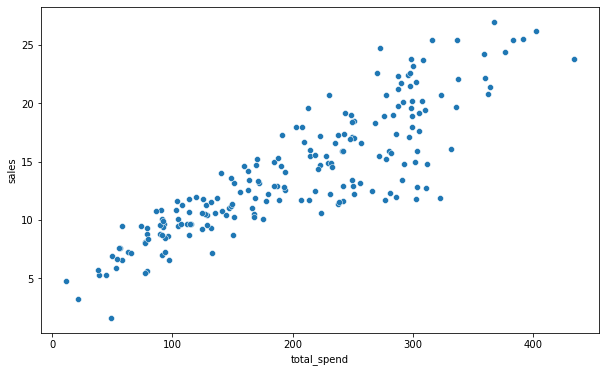

In [17]:
sns.scatterplot(x = "total_spend", y = "sales", data=df);
# total_spend deki değişim sales targetini ne kadar etkiliyor. işte bu durumu araştırmak regressiondur. 

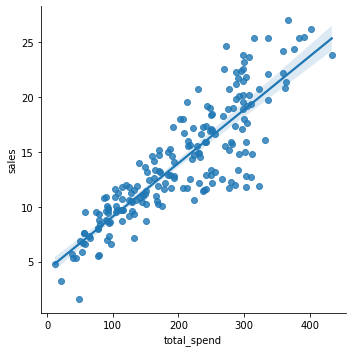

In [18]:
sns.lmplot(x = "total_spend", y = "sales", data=df);
# aralarında pozitif bir ilişki var.

In [19]:
df["sales"].corr(df["total_spend"])

0.8677123027017427

In [20]:
df = df[["total_spend","sales"]]
# simple linear regresyon işlediğimiz için tek futureye indirdik.

In [21]:
# simple linear regression için R2 scoru : tek future varsa geçerlidir.
# R2 : elimizdeki bağımsız değişkenler ile bağımlı değişkende ki değişimin oranını açıklar. yani target tahmin sutununu
# tahmin etmek için elimdeki futurenin yeterli olma oranı. burda %75 tir.

(df["sales"].corr(df["total_spend"]))**2

0.7529246402599608

### Linear regression plot : 

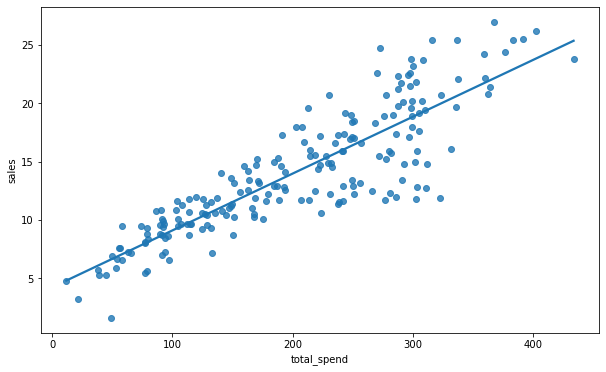

In [22]:
sns.regplot(x = "total_spend", y = "sales", data=df, ci=True);
# arkada linear regresyon denklemi ile futuredeki değerleri kullanarak bir tahmin değerleri oluşturuyor. sonra sales sutunundaki
# değerlerden tahmin edilen değerleri çıkarıp karelerini alıp topluyor. en minimun line değeri hangisi ise best line olarak 
# dönüyor.

### Test train split : 

In [23]:
X = df[["total_spend"]]
y = df["sales"]
# X dataframe, y ister dataframe ister seri olarak alabilirsiniz.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# test için %20 sini verdik.

In [26]:
X_train.shape

(160, 1)

In [27]:
X_test.shape

(40, 1)

## Modelleme : 

Bu sefer sadece default değerler ile yapacağız.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

### Skorlara Bakalım : 

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# r2 skor ve diğer 2 skorumuzu import ettik.

In [32]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [33]:
eval_metric(y_test, y_pred)
# %75 lik bir tahmileme başarısı var.

Model testing performance:
--------------------------
R2_score 	: 0.7535196255373879
MAE 		: 2.0884273558466147
MSE 		: 7.779806406885763
RMSE 		: 2.789230432733331


### scale ederek skorlara bakalım : 

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaler, y_train)
y_pred_scaler = model.predict(X_test_scaler)
eval_metric(y_test, y_pred_scaler)

Model testing performance:
--------------------------
R2_score 	: 0.7535196255373879
MAE 		: 2.0884273558466147
MSE 		: 7.779806406885763
RMSE 		: 2.789230432733331
